In [167]:
import pandas as pd
market = pd.read_csv('NASDAQ.csv',  na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

In [168]:
print("Dataframe Shape: ", market. shape)
print(market.head())

Dataframe Shape:  (23, 6)
                    Open          High           Low         Close  \
Date                                                                 
2022-01-03  15732.500000  15832.799805  15644.089844  15832.799805   
2022-01-04  15852.139648  15852.139648  15512.410156  15622.719727   
2022-01-05  15547.160156  15586.299805  15095.179688  15100.169922   
2022-01-06  15024.150391  15198.450195  14914.870117  15080.860352   
2022-01-07  15095.719727  15171.019531  14877.629883  14935.900391   

               Adj Close      Volume  
Date                                  
2022-01-03  15832.799805  4412130000  
2022-01-04  15622.719727  5109270000  
2022-01-05  15100.169922  5011990000  
2022-01-06  15080.860352  4774740000  
2022-01-07  14935.900391  4229270000  


<AxesSubplot:xlabel='Date'>

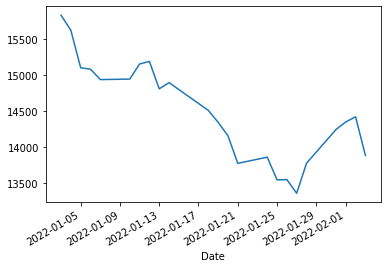

In [169]:
import matplotlib 
%matplotlib inline

market['Adj Close'].plot()

In [170]:
# y - dependent variable, x - independent variable
y = pd.DataFrame(market['Adj Close'])
x = ['Open', 'High', 'Low', 'Volume']

In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_down = scaler.fit_transform(market[x])
scale_down = pd.DataFrame(columns = x, data = scale_down, index = market.index)

scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = pd.DataFrame(data = y)#, index = market.index)


scale_down, y

(                Open      High       Low    Volume
 Date                                              
 2022-01-03  0.950469  0.990730  1.000000  0.066405
 2022-01-04  1.000000  1.000000  0.948350  0.319571
 2022-01-05  0.873737  0.872574  0.784694  0.284244
 2022-01-06  0.657208  0.686665  0.713969  0.198087
 2022-01-07  0.686838  0.673516  0.699361  0.000000
 2022-01-10  0.544446  0.569419  0.563096  0.390008
 2022-01-11  0.613783  0.667616  0.683672  0.054251
 2022-01-12  0.756134  0.744463  0.793366  0.033377
 2022-01-13  0.748658  0.716029  0.661945  0.019537
 2022-01-14  0.526329  0.542495  0.625541  0.042310
 2022-01-18  0.515486  0.467173  0.544547  0.290054
 2022-01-19  0.474247  0.428035  0.485205  0.149153
 2022-01-20  0.424827  0.419954  0.410337  0.308379
 2022-01-21  0.252340  0.194518  0.262642  0.587052
 2022-01-24  0.018543  0.053062  0.000000  1.000000
 2022-01-25  0.072103  0.007530  0.125317  0.273015
 2022-01-26  0.180117  0.113478  0.116708  0.546583
 2022-01-27 

In [172]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit(n_splits = 10)
for train_ind, test_ind in ts.split(scale_down):
    xtr, xte = scale_down[:len(train_ind)], scale_down[len(train_ind):(len(train_ind)+len(test_ind))]
    ytr, yte = y[:len(train_ind)].values.ravel(), y[len(train_ind):(len(train_ind)+len(test_ind))].values.ravel()

In [173]:
import numpy as np
trainx = np.array(xtr)
testx = np.array(xte)
xtr = trainx.reshape(xtr.shape[0], 1, xtr.shape[1])
xte = testx.reshape(xte.shape[0], 1, xte.shape[1])

In [174]:
from keras.layers import LSTM, Dense, Dropout
from keras.utils.vis_utils import plot_model
from keras.models import Sequential

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainx.shape[1]), activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
xtr

array([[[0.95046859, 0.99072976, 1.        , 0.06640544]],

       [[1.        , 1.        , 0.94834955, 0.31957119]],

       [[0.87373696, 0.87257402, 0.78469379, 0.28424405]],

       [[0.6572083 , 0.68666465, 0.7139686 , 0.19808693]],

       [[0.68683836, 0.67351621, 0.69936138, 0.        ]],

       [[0.5444457 , 0.56941936, 0.56309636, 0.39000759]],

       [[0.61378305, 0.66761582, 0.68367166, 0.05425084]],

       [[0.75613447, 0.74446274, 0.79336642, 0.03337703]],

       [[0.74865772, 0.71602851, 0.66194545, 0.01953742]],

       [[0.52632854, 0.54249522, 0.62554115, 0.0423105 ]],

       [[0.51548597, 0.4671729 , 0.54454717, 0.29005444]],

       [[0.47424679, 0.42803512, 0.4852047 , 0.14915259]],

       [[0.42482696, 0.41995385, 0.41033721, 0.30837894]],

       [[0.2523401 , 0.19451818, 0.26264199, 0.58705228]],

       [[0.0185433 , 0.05306233, 0.        , 1.        ]],

       [[0.07210318, 0.00753031, 0.12531745, 0.27301548]],

       [[0.18011684, 0.11347756, 0.11670

In [175]:
log=lstm.fit(xtr, ytr, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
3/3 [==============================] - 1s 5ms/step - loss: 0.2911
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2792
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2682
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2574
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 0.2468
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 0.2362
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2257
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2154
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2054
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1857
Epoch 12/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1759
Epoch 13/50
3/3 [==============================] - 0s 9ms/step - loss:

In [176]:
y_prediction= lstm.predict(xte)
xte

array([[[0.43791785, 0.3541845 , 0.45892441, 0.15192705]],

       [[0.25217878, 0.21185564, 0.29696709, 0.02804237]]])

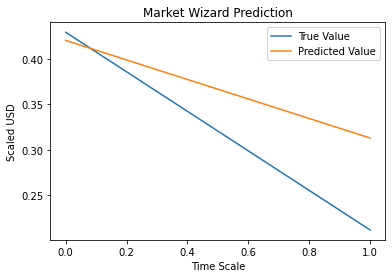

In [177]:
import matplotlib. pyplot as plt
plt.plot(yte, label = 'True Value')
plt.plot(y_prediction, label = 'Predicted Value')
plt.title("Market Wizard Prediction")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [178]:
oot = pd.read_csv('NASDAQ_OOT.csv',  na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
x = ['Open', 'High', 'Low', 'Volume']
y = pd.DataFrame(oot['Adj Close'])

scaler = MinMaxScaler()
scale_down = scaler.fit_transform(oot[x])
scale_down = pd.DataFrame(columns = x, data = scale_down, index = market.index)

scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = pd.DataFrame(data = y)#, index = market.index)

scale_down = np.array(scale_down)
scale_down = scale_down.reshape(scale_down.shape[0],1,scale_down.shape[1])
print(scale_down, y)

#scale_down = np.array(scale_down).reshape(-1)
y = np.array(y).reshape(-1)
#sd = trainx.reshape(xtr.shape[0], 1, xtr.shape[1])
#xte = testx.reshape(xte.shape[0], 1, xte.shape[1])

out_of_time_prediction = lstm.predict(scale_down)



[[[0.95046859 0.99072976 1.         0.06640544]]

 [[1.         1.         0.94834955 0.31957119]]

 [[0.87373696 0.87257402 0.78469379 0.28424405]]

 [[0.6572083  0.68666465 0.7139686  0.19808693]]

 [[0.68683836 0.67351621 0.69936138 0.        ]]

 [[0.5444457  0.56941936 0.56309636 0.39000759]]

 [[0.61378305 0.66761582 0.68367166 0.05425084]]

 [[0.75613447 0.74446274 0.79336642 0.03337703]]

 [[0.74865772 0.71602851 0.66194545 0.01953742]]

 [[0.52632854 0.54249522 0.62554115 0.0423105 ]]

 [[0.51548597 0.4671729  0.54454717 0.29005444]]

 [[0.47424679 0.42803512 0.4852047  0.14915259]]

 [[0.42482696 0.41995385 0.41033721 0.30837894]]

 [[0.2523401  0.19451818 0.26264199 0.58705228]]

 [[0.0185433  0.05306233 0.         1.        ]]

 [[0.07210318 0.00753031 0.12531745 0.27301548]]

 [[0.18011684 0.11347756 0.11670802 0.54658295]]

 [[0.11355341 0.         0.08943525 0.33653026]]

 [[0.         0.002876   0.05566289 0.26389681]]

 [[0.1554508  0.22863747 0.26400296 0.32036649]]



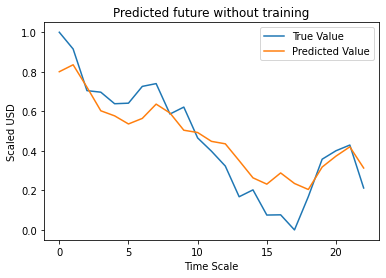

In [179]:
import matplotlib. pyplot as plt
plt.plot(y, label = 'True Value')
plt.plot(out_of_time_prediction, label = 'Predicted Value')
plt.title("Predicted future without training")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [203]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor as rfr
y = np.array(y).reshape(-1)
out_of_time_prediction = np.array(out_of_time_prediction).reshape(-1)
print(out_of_time_prediction)
print(y,'\n','\n')

print('Accuracy of this code is ',r2_score(out_of_time_prediction, y))

[0.80032223 0.83541095 0.7221023  0.6026877  0.5769881  0.53601354
 0.5641197  0.63638854 0.5915115  0.50433165 0.49276182 0.44797903
 0.43558964 0.3503825  0.2634505  0.23161793 0.28826344 0.2349135
 0.2044886  0.3180551  0.3732878  0.42036033 0.31313264]
[1.         0.91529096 0.70458705 0.696801   0.63834986 0.64114407
 0.72607086 0.74015924 0.58629752 0.62135387 0.46536735 0.39817408
 0.3230778  0.16779692 0.20255873 0.07520496 0.07634611 0.
 0.1684624  0.35769864 0.40048867 0.42933917 0.21211125] 
 

Accuracy of this code is  0.5698907261025501
